In [1]:
# Import required Libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv("/Users/avinashbehera/Desktop/Meriskill/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<Axes: >

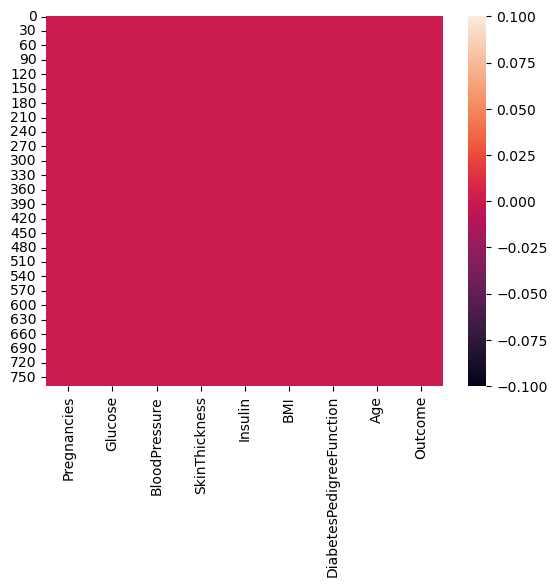

In [4]:
sns.heatmap(data.isnull())

In [6]:
correlation = data.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

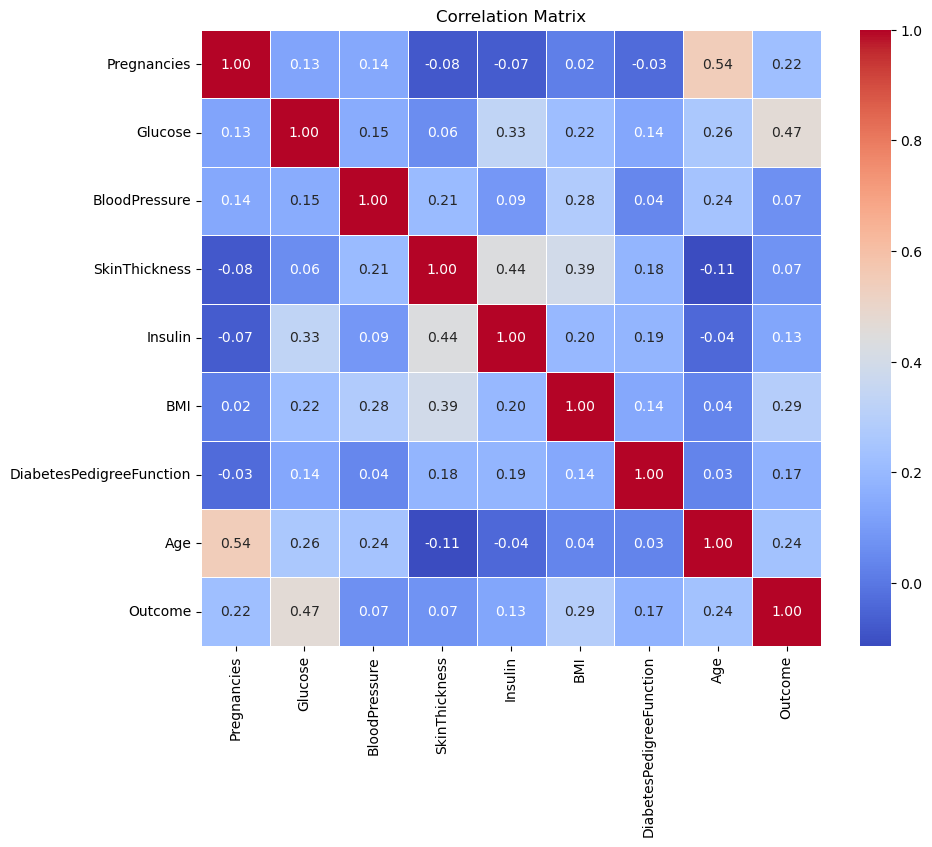

In [8]:
# Plot correlation matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [9]:
X =data.drop("Outcome" ,axis=1)
Y =data['Outcome']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

In [10]:
model = LogisticRegression()
model.fit(X_train,Y_train)

/Users/avinashbehera/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
prediction = model.predict(X_test)
print(prediction)

[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0
 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1
 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 0 0 0 0]


In [12]:
accuracy = accuracy_score(prediction, Y_test)
print(accuracy)

0.7922077922077922


In [13]:
print("\nDescriptive statistics:")
print(data.describe())



Descriptive statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0

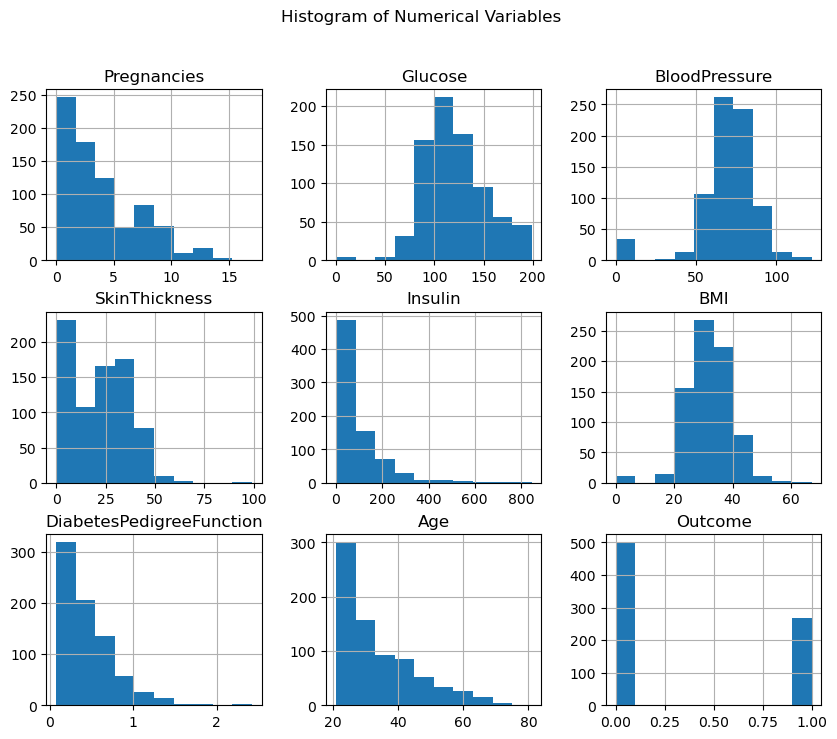

In [14]:
# Data visualization
# Histogram for numerical variables
data.hist(figsize=(10, 8))
plt.suptitle("Histogram of Numerical Variables")
plt.show()


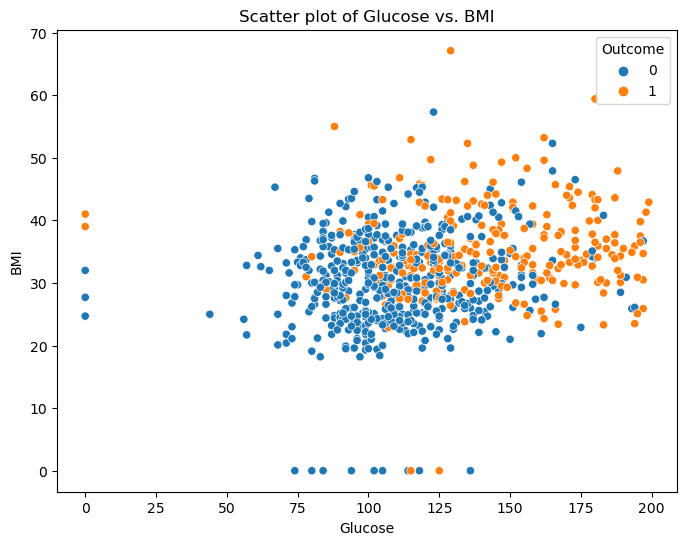

In [15]:
# Scatter plot for Glucose vs. BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Glucose', y='BMI', hue='Outcome')
plt.title('Scatter plot of Glucose vs. BMI')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()


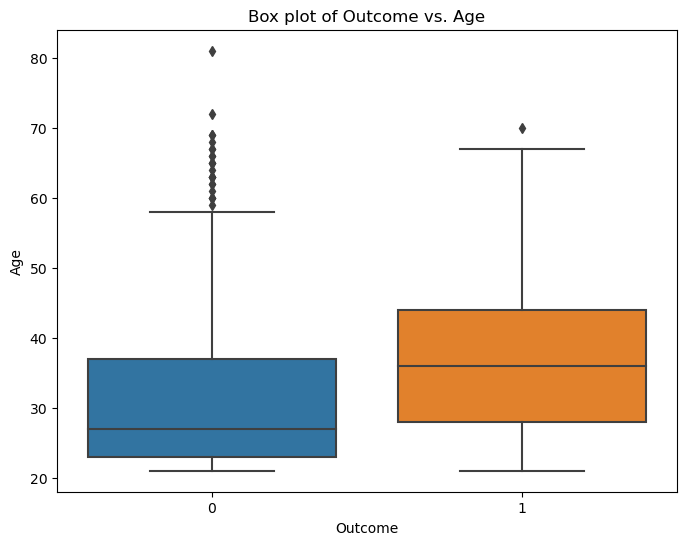

In [16]:
# Box plot for Outcome vs. Age
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Outcome', y='Age')
plt.title('Box plot of Outcome vs. Age')
plt.xlabel('Outcome')
plt.ylabel('Age')
plt.show()


In [17]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_mat = confusion_matrix(Y_test, prediction)
print("Confusion Matrix:")
print(confusion_mat)

class_report = classification_report(Y_test, prediction)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[92  8]
 [24 30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       100
           1       0.79      0.56      0.65        54

    accuracy                           0.79       154
   macro avg       0.79      0.74      0.75       154
weighted avg       0.79      0.79      0.78       154



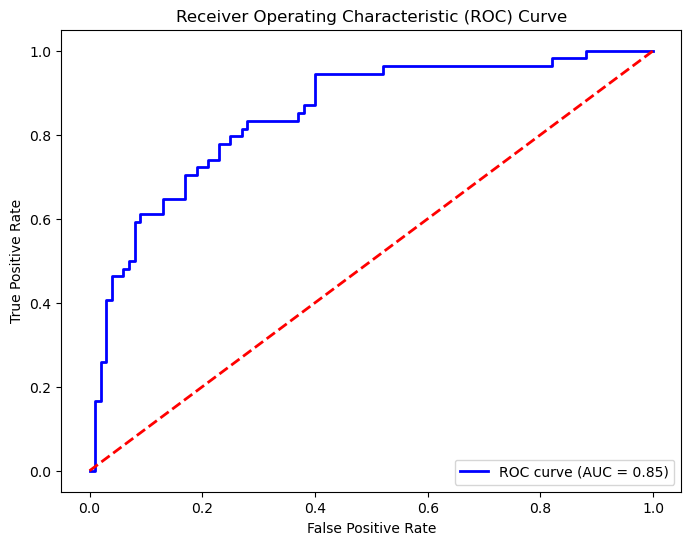

AUC Score: 0.8487037037037037


In [18]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute probabilities for class 1
probabilities = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(Y_test, probabilities)
auc_score = roc_auc_score(Y_test, probabilities)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("AUC Score:", auc_score)

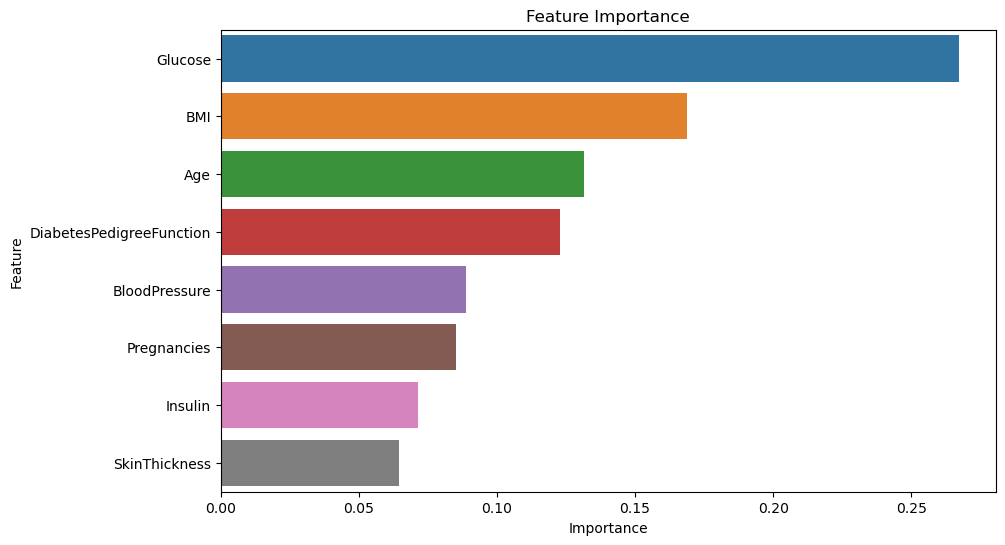

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Separate features (X) and target variable (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier.fit(X, y)

# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_classifier.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

/Users/avinashbehera/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


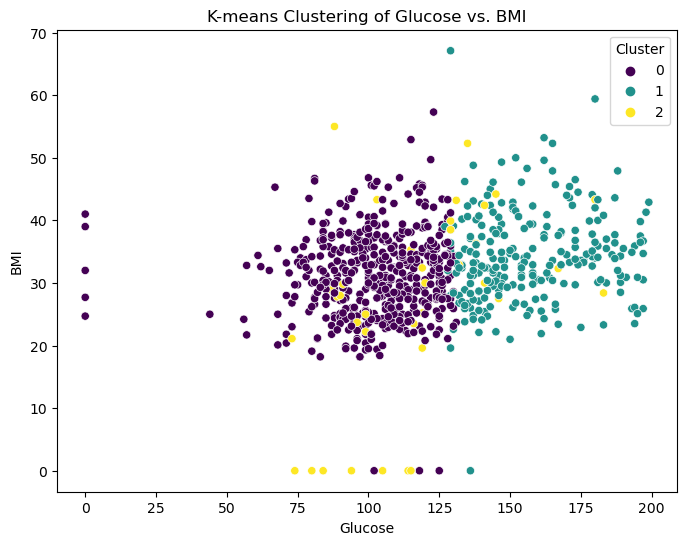

In [20]:
from sklearn.cluster import KMeans

# Selecting relevant features for clustering
X = data[['Glucose', 'BloodPressure', 'BMI']]

# Performing K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Visualizing the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Glucose', y='BMI', hue='Cluster', palette='viridis')
plt.title('K-means Clustering of Glucose vs. BMI')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()